In [1]:
from TMFG_core import TMFG as FastTMFG
from optimised_tmfg import TMFG as OptimisedTMFG
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def run(size):
    random_matrix = np.random.rand(size, size)
    # Make it symmetric by averaging with its transpose
    W = (random_matrix + random_matrix.T) / 2

    start = time.time()
    _, _, fast_tmfg_adjacency_matrix = FastTMFG().fit_transform(pd.DataFrame(W), output='unweighted_sparse_W_matrix')
    fast_tmfg_time = time.time() - start
    print(f"Fast TMFG took {fast_tmfg_time} seconds")

    start = time.time()
    _, _, tmfg_adjacency_matrix = OptimisedTMFG().fit_transform(weights=W.copy(), output='unweighted_sparse_W_matrix')
    tmfg_time = time.time() - start
    print(f"TMFG took {tmfg_time} seconds")

    return fast_tmfg_time, tmfg_time


In [9]:
result = []
test_sizes = [i * 100 for i in range(1, 10)] + [i * 1000 for i in range(1, 11)]
for size in test_sizes:
    fast_tmfg_average, tmfg_average = 0, 0
    for _ in range(3):
        fast_tmfg_time, tmfg_time = run(size)
        fast_tmfg_average += fast_tmfg_time
        tmfg_average += tmfg_time

    fast_tmfg_average /= 3
    tmfg_average /= 3
    result.append([size, fast_tmfg_average, tmfg_average])


Fast TMFG took 0.015748977661132812 seconds
TMFG took 0.00185394287109375 seconds
Fast TMFG took 0.015707969665527344 seconds
TMFG took 0.001505136489868164 seconds
Fast TMFG took 0.011152982711791992 seconds
TMFG took 0.0013470649719238281 seconds
Fast TMFG took 0.02371811866760254 seconds
TMFG took 0.003046751022338867 seconds
Fast TMFG took 0.022829055786132812 seconds
TMFG took 0.003197193145751953 seconds
Fast TMFG took 0.0229947566986084 seconds
TMFG took 0.00299072265625 seconds
Fast TMFG took 0.03651690483093262 seconds
TMFG took 0.005379676818847656 seconds
Fast TMFG took 0.03639578819274902 seconds
TMFG took 0.004645109176635742 seconds
Fast TMFG took 0.03677701950073242 seconds
TMFG took 0.005605936050415039 seconds
Fast TMFG took 0.05567789077758789 seconds
TMFG took 0.008485078811645508 seconds
Fast TMFG took 0.05644798278808594 seconds
TMFG took 0.007227182388305664 seconds
Fast TMFG took 0.05247783660888672 seconds
TMFG took 0.006970882415771484 seconds
Fast TMFG took 0.

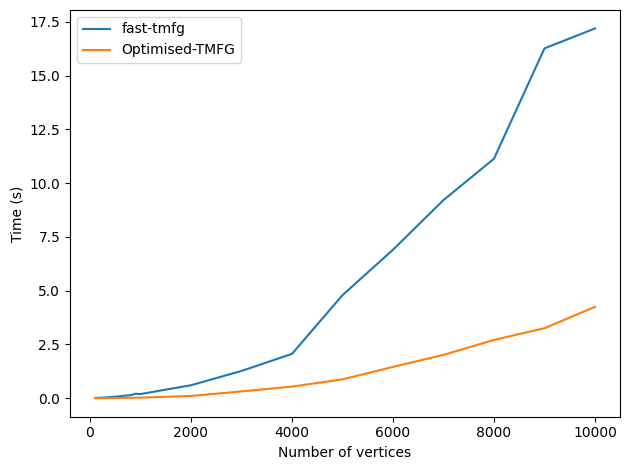

In [10]:
result = np.array(result)
plt.plot(result[:, 0], result[:, 1], label='fast-tmfg')
plt.plot(result[:, 0], result[:, 2], label='Optimised-TMFG')
plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.legend()
plt.tight_layout()
plt.show()


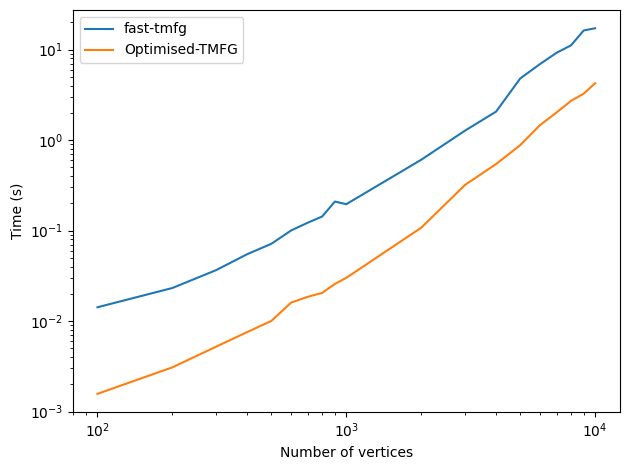

In [11]:
result = np.array(result)
plt.plot(result[:, 0], result[:, 1], label='fast-tmfg')
plt.plot(result[:, 0], result[:, 2], label='Optimised-TMFG')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.legend()
plt.tight_layout()
plt.show()
